In [1]:
# filepath: /C:/Users/ADMIN/Downloads/EDA Olympics.py
import os

# Create folder to store plots
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

plot_counter = 1  # Global counter for file names

def save_and_show():
    global plot_counter
    filename = os.path.join(output_dir, f"plot_{plot_counter:02d}.png")
    plt.savefig(filename, dpi=300)
    print(f"Saved {filename}")
    plt.close()
    plot_counter += 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
print(os.getcwd())

C:\Users\ADMIN\Desktop


In [4]:
# Read the Olympics dataset and display the first few rows
olymp = pd.read_csv(r"C:\Users\ADMIN\Desktop\dataset_olympics.csv")
olymp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Dataset Info
olymp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [6]:
# Summary Statistics
olymp.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [7]:
olymp.describe(include=["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


In [8]:
# Checking for missing values 
olymp.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [9]:
# Checking and removing duplicated values
olymp.duplicated().sum()
olymp.drop_duplicates(inplace = True)
olymp.duplicated().sum()

0

In [10]:
# VISUALIZATIONS
# Countplot for Gender Distribution 
sns.countplot(data=olymp, x="Sex", color=sns.color_palette("viridis", 1)[0])
plt.title("Distributions by Gender")
save_and_show()

Saved plots\plot_01.png


In [11]:
# Histogram: Age Distribution 

sns.histplot(data=olymp, x="Age", bins=10, kde=True, fill=True, 
             color=sns.color_palette("viridis", 1)[0], alpha=0.5)
plt.title("Distribution of Age")
save_and_show()

Saved plots\plot_02.png


In [12]:
# Histogram: Height Distribution 

import matplotlib.cm as cm
sns.histplot(data=olymp, x="Height", bins=20, kde=True, fill=True, 
             color=sns.color_palette("viridis", 1)[0], alpha=0.5)
plt.title("Height Distribution")
save_and_show()

Saved plots\plot_03.png


In [13]:
# Histogram: Weight Distribution 

sns.histplot(data=olymp, x="Weight", bins=20, kde=True, fill=True, 
             color=sns.color_palette("cividis", 1)[0], alpha=0.5)
plt.title("Weight Distribution")
save_and_show()

Saved plots\plot_04.png


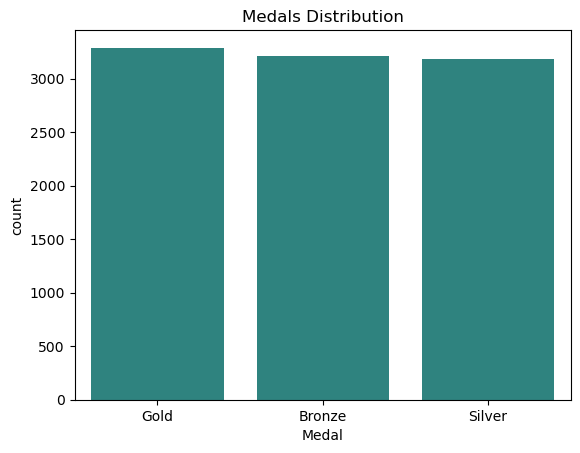

In [14]:
# Countplot: Medals Distribution 

sns.countplot(data=olymp, x="Medal", color=sns.color_palette("viridis", 1)[0])
plt.title("Medals Distribution")
plt.show()


In [15]:
# Countplot: Distribution of Medals Over the Years 
sns.countplot(data= olymp, x ="Year", hue = "Medal")
plt.title("Distribution of Medals Over the Years")
plt.xticks(rotation = 90)
save_and_show()

Saved plots\plot_05.png


In [16]:
#GROUP BY YEAR & CALCULATE AVERAGE AGE
Y_avg_age = olymp.groupby("Year")["Age"].mean()
print(Y_avg_age)

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


In [17]:
# Calculate median Height by Sport
medianheight_sport = olymp.groupby("Sport")["Height"].median()
print(medianheight_sport)

Sport
Alpine Skiing       173.0
Alpinism              NaN
Archery             172.0
Art Competitions    183.0
Athletics           176.0
                    ...  
Tug-Of-War          182.0
Volleyball          187.5
Water Polo          185.0
Weightlifting       168.0
Wrestling           172.0
Name: Height, Length: 65, dtype: float64


In [18]:
# Maximum and Minimum values of median height of sports
print("Max:" ,medianheight_sport.max())
print("Min:" ,medianheight_sport.min())

Max: 190.0
Min: 164.0


In [19]:
# Sports with median height
medianheight_sport[medianheight_sport == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [20]:
# Count the number of participants grouped by Country (NOC) and Gender
country_gender_count = olymp.groupby(["NOC" , "Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [21]:
# Calculate gold medals per country 

goldmedals_country = olymp[olymp["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print("Gold Medals by Country:", goldmedals_country)

Gold Medals by Country: NOC
ALG      1
ANZ      7
ARG     25
ARM      1
AUS     98
      ... 
URU     13
USA    747
UZB      4
YUG     31
ZIM      7
Name: Medal, Length: 84, dtype: int64


In [22]:
print("Maximum gold medals:", goldmedals_country.max())

Maximum gold medals: 747


In [23]:
# Countries with 747 Gold Medals
goldmedals_country[goldmedals_country == 747]

NOC
USA    747
Name: Medal, dtype: int64

In [24]:
# Calculate average Weight by Sport and Gender
avgweight_sport_gender = olymp.groupby(["Sport", "Sex"])["Weight"].mean()

# Average Weight for Wrestling (Female)
print(avgweight_sport_gender["Wrestling"]["F"])

58.16901408450704


In [25]:
# Bar Chart: Number of Unique Events per Sport 

sportevent_count = olymp.groupby("Sport")["Event"].nunique().sort_values(ascending = False)
colors= plt.cm.viridis(np.linspace(0, 1, len(sportevent_count)))
plt.figure(figsize=(14, 7))
bars = sportevent_count.plot(kind = "bar",color=colors)
plt.title("Number of Unique Events per sport")
plt.xlabel("Sport")
plt.ylabel("Number of Unique Events")
plt.xticks(rotation = 90, fontsize=8)
plt.tight_layout()
save_and_show()

Saved plots\plot_06.png


In [26]:
# Line Plot: Number of Participants Over the Years 

YearParticipant_count = olymp.groupby("Year")["ID"].nunique()
plt.figure(figsize=(10, 5))
plt.plot(YearParticipant_count, marker='o', linestyle='-', 
         color=sns.color_palette("viridis", 1)[0], linewidth=2, markersize=6)

plt.title("Number of Participants Over the Years", fontsize=12, fontweight='bold', color='black')
plt.xlabel("Year", fontsize=10, fontweight='bold')
plt.ylabel("Number of Participants", fontsize=10, fontweight='bold')

plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
save_and_show()

Saved plots\plot_07.png


In [27]:
# ALTERNATE BAR PLOT VISUALIZATION FOR THE LINE PLOT OF THE NUMBER OF PARTICIPANT OVER THE YEARS 

YearParticipant_count = olymp.groupby("Year")["ID"].nunique()
colors= plt.cm.viridis(np.linspace(0, 1, len(YearParticipant_count)))
plt.figure(figsize=(14, 7))
bars = YearParticipant_count.plot(kind = "bar",color=colors)
plt.title("Number of participants over the years")
plt.xlabel("Year")
plt.ylabel("Number of Participants")
save_and_show()

Saved plots\plot_08.png


In [28]:
# Bar Plot: Top 10 Countries with the Highest Average Age 

country_avg_age = olymp.groupby("NOC")["Age"].mean().sort_values(ascending = False)
plt.figure(figsize=(14, 7))
colors= plt.cm.viridis(np.linspace(0, 1, len(country_avg_age.head(10))))
bars = country_avg_age.head(10).plot(kind = "bar",color=colors)
plt.title("Top 10 countries with the Highest Average age of participants")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation = 90)
save_and_show()

Saved plots\plot_09.png


In [29]:
# Bar Plot: Top 10 Countries with the Lowest Average Age
# Show the lowest "country_avg_age" by using the 'tail()' function to view from the bottom

country_avg_age = olymp.groupby("NOC")["Age"].mean().sort_values(ascending = False)
plt.figure(figsize=(14, 7))
colors= plt.cm.viridis(np.linspace(0, 1, len(country_avg_age.tail(10))))
bars = country_avg_age.tail(10).plot(kind = "bar",color=colors)
plt.title("Top 10 countries with the Lowest Average age of participants")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation = 90)
save_and_show()

Saved plots\plot_10.png


In [30]:
# Boxplot: Age Distributions by Season 
plt.figure(figsize=(10, 6))
sns.boxplot(data = olymp, x = "Season", y = "Age", palette="viridis")
plt.title("Distributions of Ages by Seasons")
plt.xlabel("Season")
plt.ylabel("Age")
save_and_show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11348\1609190677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = olymp, x = "Season", y = "Age", palette="viridis")


Saved plots\plot_11.png


In [31]:
# Violin Plot: Height Distribution by Medal 
# Update palette from Set2 to viridis for a modern look
sns.violinplot(data=olymp, x="Medal", y="Height", palette="viridis")
plt.title("Distribution of Heights by Medal")
plt.xlabel("Medal")
plt.ylabel("Height")
save_and_show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11348\1733967485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=olymp, x="Medal", y="Height", palette="viridis")


Saved plots\plot_12.png


In [32]:
# COUNTRY WITH THE MOST MEDALS
country_mostmedals = olymp["NOC"].value_counts().idxmax()
print("Most Awarded Country(Medals):", country_mostmedals)

Most Awarded Country(Medals): USA


In [33]:
# Tallest Athlete
tallest_athlete = olymp[olymp["Height"] == olymp["Height"].max()]
print("Tallest Athlete:")
print(tallest_athlete[["ID", "Name", "Height", "Sport","Year"]])

Tallest Athlete:
          ID                  Name  Height       Sport  Year
32376  16639  Tommy Loren Burleson   223.0  Basketball  1972


In [34]:
# Shortest Athlete
shortest_athlete = olymp[olymp["Height"] == olymp["Height"].min()]
print("Shortest Athlete:")
print(shortest_athlete[["ID","Name", "Height", "Sport", "Year","Event"]])

Shortest Athlete:
          ID             Name  Height       Sport  Year  \
29333  15150  Rosario Briones   127.0  Gymnastics  1968   
29334  15150  Rosario Briones   127.0  Gymnastics  1968   
29335  15150  Rosario Briones   127.0  Gymnastics  1968   
29336  15150  Rosario Briones   127.0  Gymnastics  1968   
29337  15150  Rosario Briones   127.0  Gymnastics  1968   
29338  15150  Rosario Briones   127.0  Gymnastics  1968   

                                          Event  
29333  Gymnastics Women's Individual All-Around  
29334        Gymnastics Women's Team All-Around  
29335         Gymnastics Women's Floor Exercise  
29336            Gymnastics Women's Horse Vault  
29337            Gymnastics Women's Uneven Bars  
29338           Gymnastics Women's Balance Beam  


In [35]:
# Heaviest Athlete

heaviest_athlete = olymp[olymp["Weight"] == olymp["Weight"].max()]
print("Heaviest Athlete:")
print(heaviest_athlete[["ID", "Name", "Height", "Sport", "Year","Event"]])

Heaviest Athlete:
          ID               Name  Height Sport  Year                   Event
23155  12177  Ricardo Blas, Jr.   183.0  Judo  2008  Judo Men's Heavyweight
23156  12177  Ricardo Blas, Jr.   183.0  Judo  2012  Judo Men's Heavyweight


In [36]:
# Scatter Plot: Athlete Height vs Weight by Medal Status 

sns.scatterplot(data = olymp, x = "Height", y = "Weight", hue = "Medal", palette = "Set2")
plt.title("Athlete Height vs Weight by Medal Status")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(title = "Medal")
save_and_show()

Saved plots\plot_13.png


In [37]:
# Heatmap: Medal Counts by Country and Year 
MedalsbyCountry_year = olymp.pivot_table(index = "NOC", columns = "Year", values = "Medal", aggfunc = "count")
sns.heatmap(MedalsbyCountry_year, cmap = "viridis", linewidths = 0.5)
plt.title("Medal Counts by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(rotation = 90, fontsize=8)
save_and_show()

Saved plots\plot_14.png
